# Import Libraries

In [1]:
!pip install numpy==1.18.5
!pip install pandas==1.0.5
!pip install matplotlib==3.2.1
!pip install pandas-profiling==2.8.0
!pip install tensorflow==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.18.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.18.5 which is incompatible.
jaxlib 0.3.7+cuda11.cudnn805 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
jax 0.3.8 requires numpy>=1.19, but you have numpy 1.18.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 28.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 1.0.5 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.18.5 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.4 MB 9.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 259 kB 27.5 MB/s 
     |████████████████████████████████| 690 kB 55.8 MB/s 
     |████████████████████████████████| 59 kB 6.3 MB/s 
     |████████████████████████████████| 4.7 MB 59.6 MB/s 
     |████████████████████████████████| 812 kB 52.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a9373e02d26364c97e5bb94dfc6f69ab86f9c270bfc9314712a83e150aff41f1
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=49c3a6972dc78b4d50ae1047f73a4d4843889519a24c26d6076901e44563479a
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import tensorflow.keras as k
# import gender_guesser.detector as gender

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_users = pd.read_csv("users.csv")
df_fusers = pd.read_csv("fusers.csv")

In [5]:
print(df_fusers.shape)
print(df_users.shape)

(3351, 38)
(3474, 42)


# Data Pre-Processing

In [6]:
df_fusers.isnull().sum()

id                                       0
name                                     0
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   3250
lang                                     0
time_zone                             3016
location                               575
default_profile                        317
default_profile_image                 3345
geo_enabled                           3212
profile_image_url                        0
profile_banner_url                    3284
profile_use_background_image             9
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color             0
profile_bac

In [7]:
#for df_fusers
isFake = np.ones(3351)

#for df_users
isNotFake = np.zeros(3474)

In [8]:
#adding is fake or not column to make predictions for it
df_fusers["isFake"] = isFake
df_users["isFake"] = isNotFake


In [9]:
df_allUsers = pd.concat([df_fusers, df_users], ignore_index=True)
df_allUsers.columns = df_allUsers.columns.str.strip()

In [10]:
#to shuffle the whole data
df_allUsers = df_allUsers.sample(frac=1).reset_index(drop=True)

In [11]:
df_allUsers.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,...,is_translator,follow_request_sent,protected,verified,notifications,contributors_enabled,following,isFake,test_set_1,test_set_2
count,6.825000e+03,6825.000000,6825.000000,6825.000000,6825.000000,6825.000000,4066.0,19.0,2294.0,6426.0,...,1.0,0.0,78.0,11.0,0.0,0.0,0.0,6825.000000,3474.000000,3474.000000
mean,8.499737e+08,8667.221685,717.874432,504.022564,2378.999121,9.959853,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.490989,0.287853,0.141048
std,7.662248e+08,23473.945131,12301.657025,1159.286294,8548.235726,112.952257,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.499955,0.452827,0.348121
min,6.780330e+05,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,2.597067e+08,23.000000,12.000000,206.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,6.168972e+08,190.000000,33.000000,312.000000,10.000000,0.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,1.174963e+09,6900.000000,349.000000,555.000000,1360.000000,2.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,0.000000
max,3.164942e+09,399555.000000,986837.000000,46310.000000,313954.000000,6166.000000,1.0,1.0,1.0,1.0,...,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.000000,1.000000,1.000000


In [12]:
df_allUsers.head

<bound method NDFrame.head of               id            name      screen_name  statuses_count  \
0     1174338175  Nadine Mccowan  MccowanezvNadin              22   
1      742326175       ANGELOU ✨  AngelouSantos21            9550   
2      354206693        ldc_2015         ldc_2015            3177   
3     1175937380     Gracie Boyd    BoydliwGracie              15   
4     2534780916            Jeah        jeahlacar            2313   
...          ...             ...              ...             ...   
6820  2508074020              ©®    ChloeRaphael5            1026   
6821   616972396    Gaye Bentley   gayebentleyxjn              39   
6822   551846148   Carys Goodwin       cgoodwin23            4692   
6823    20773759             Chi     rainborn8228           18257   
6824  2593282854            Jess        _jess2558            3765   

      followers_count  friends_count  favourites_count  listed_count  \
0                   8            191                 2             0 

In [13]:
Y = df_allUsers.isFake

In [14]:
Y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: isFake, dtype: float64

In [15]:
df_allUsers.columns

Index(['id', 'name', 'screen_name', 'statuses_count', 'followers_count',
       'friends_count', 'favourites_count', 'listed_count', 'created_at',
       'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'is_translator',
       'follow_request_sent', 'protected', 'verified', 'notifications',
       'description', 'contributors_enabled', 'following', 'updated', 'isFake',
       'timestamp', 'crawled_at', 'test_set_1', 'test_set_2'],
      dtype='object')

In [16]:
df1=df_allUsers[['id','favourites_count','followers_count','statuses_count','friends_count','default_profile','default_profile_image','profile_use_background_image','utc_offset','listed_count','geo_enabled','lang','isFake']]

In [17]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang,isFake
0,1174338175,2,8,22,191,1.0,NaN,1.0,NaN,0,NaN,en,1.0
1,742326175,9175,500,9550,416,NaN,NaN,1.0,28800.0,4,1.0,en,0.0
2,354206693,88,105,3177,82,NaN,NaN,NaN,28800.0,0,1.0,en,0.0
3,1175937380,0,11,15,220,1.0,NaN,1.0,NaN,0,NaN,en,1.0
4,2534780916,1613,284,2313,282,NaN,NaN,1.0,28800.0,0,1.0,en,0.0


In [18]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
print(lang_dict)

{'Select Language...': 0, 'ar': 1, 'da': 2, 'de': 3, 'el': 4, 'en': 5, 'en-AU': 6, 'en-GB': 7, 'en-gb': 8, 'es': 9, 'fil': 10, 'fr': 11, 'id': 12, 'it': 13, 'ja': 14, 'ko': 15, 'nl': 16, 'pl': 17, 'pt': 18, 'ru': 19, 'sv': 20, 'tr': 21, 'xx-lc': 22, 'zh-TW': 23, 'zh-cn': 24, 'zh-tw': 25}


In [19]:
z=df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)


In [20]:
lang_list = list(enumerate(np.unique(df1["lang"])))
lang_dict = {name : i for i, name in lang_list}
df1.loc[:, "lang_num"] = df1["lang"].map(lambda x: lang_dict[x]).astype(int)

In [21]:
df1.drop(["lang"], axis=1, inplace=True)

In [22]:
df1.drop(["isFake"], axis=1, inplace=True)

In [23]:
df1.head()

,id,favourites_count,followers_count,statuses_count,friends_count,default_profile,default_profile_image,profile_use_background_image,utc_offset,listed_count,geo_enabled,lang_num
0,1174338175,2,8,22,191,1.0,NaN,1.0,NaN,0,NaN,5
1,742326175,9175,500,9550,416,NaN,NaN,1.0,28800.0,4,1.0,5
2,354206693,88,105,3177,82,NaN,NaN,NaN,28800.0,0,1.0,5
3,1175937380,0,11,15,220,1.0,NaN,1.0,NaN,0,NaN,5
4,2534780916,1613,284,2313,282,NaN,NaN,1.0,28800.0,0,1.0,5


In [24]:
df1.isnull().sum()

id                                 0
favourites_count                   0
followers_count                    0
statuses_count                     0
friends_count                      0
default_profile                 2759
default_profile_image           6806
profile_use_background_image     399
utc_offset                      4015
listed_count                       0
geo_enabled                     4531
lang_num                           0
dtype: int64

In [25]:
df1 = df1.replace(np.nan, 0) #To replace the missing boolean values with zeros as it means false

In [26]:
df1.isnull().sum()

id                              0
favourites_count                0
followers_count                 0
statuses_count                  0
friends_count                   0
default_profile                 0
default_profile_image           0
profile_use_background_image    0
utc_offset                      0
listed_count                    0
geo_enabled                     0
lang_num                        0
dtype: int64

# Input Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, Y, test_size=0.3) # 70% training and 30% test

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 12)
(2048, 12)
(4777,)
(2048,)


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [30]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

# XGB Classifer

In [31]:
from xgboost import XGBClassifier
cross_val_score(XGBClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99267578, 0.99365234, 0.99511719, 0.99462891, 0.99462891,
       0.9921875 , 0.99365234, 0.99267578, 0.99169922, 0.99365234])

In [32]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [33]:
# make predictions for test data
y_pred = classifier.predict(X_test)
predictions = [round(value) for value in y_pred]

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
x=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.22%


# AdaBoost Classifier

In [35]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = classifier.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
y=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.02%


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(DecisionTreeClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99023438, 0.98681641, 0.99023438, 0.98779297, 0.98876953,
       0.98583984, 0.99121094, 0.984375  , 0.98535156, 0.99023438])

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier()
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
z=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.22%


# Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
cross_val_score(RandomForestClassifier(),df1,Y,scoring='accuracy',cv=cv)

array([0.99023438, 0.99511719, 0.99414062, 0.99316406, 0.99169922,
       0.99267578, 0.99511719, 0.99365234, 0.99072266, 0.99414062])

In [43]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
classifier=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
c=accuracy
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.22%


In [45]:
import sklearn
from sklearn import ensemble
from sklearn import tree
from sklearn import svm

import seaborn as sns

model = [
    ensemble.AdaBoostClassifier(),
    ensemble.RandomForestClassifier(),     
    tree.DecisionTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    ]

In [46]:
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)

row_index = 0
for alg in model: 
    predicted = alg.fit(X_train, y_train).predict(X_test)
    model_compare.loc[row_index, 'model Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    model_compare.loc[row_index, 'model Precission'] = precision_score(y_test, predicted)
    model_compare.loc[row_index, 'model Recall'] = recall_score(y_test, predicted)
    
model_compare.sort_values(by = ['model Test Accuracy'], ascending = False, inplace = True)    
model_compare

,model Test Accuracy,model Precission,model Recall
0,0.9585,0.940341,0.978325


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=[10,8])

# plt.bar(model, width = 0.5, color='#0504aa',alpha=0.7)
# plt.ylim([0.85,1])
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.ylabel('Frequency',fontsize=15)
# plt.title('Normal Distribution Histogram')
# plt.show()

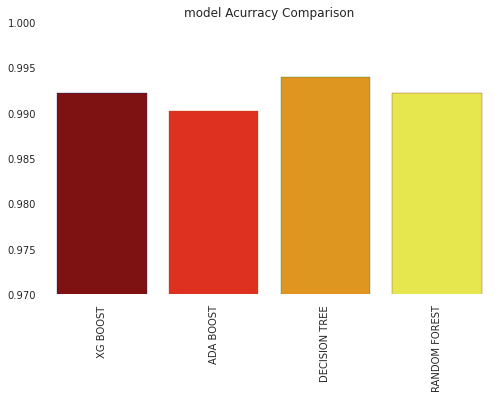

In [48]:
plt.subplots(figsize=(8,5))
data=[]
data.append(x)
data.append(y)
data.append(0.994)
data.append(c)
label=['XG BOOST','ADA BOOST','DECISION TREE','RANDOM FOREST']
sns.barplot(label,data,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.ylim([0.97,1])
plt.title('model Acurracy Comparison')
plt.show()

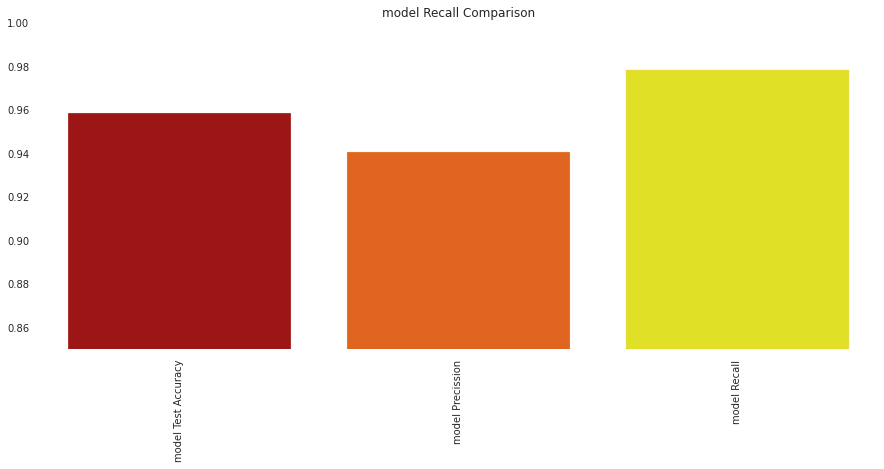

In [49]:
plt.subplots(figsize=(15,6))
sns.barplot(data=model_compare,palette='hot',edgecolor=sns.color_palette('OrRd',9))
plt.xticks(rotation=90)
plt.ylim([0.85,1])
plt.title('model Recall Comparison')
plt.show()
# 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_...

In [50]:
# index = 1
# for alg in model:
#     predicted = alg.fit(X_train, y_train).predict(X_test)
#     roc_auc_model = metrics.auc(fp, tp)
#     model_name = alg.__class__.__name__
#     plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (model_name, roc_auc_model))

# plt.title('ROC Curve comparison')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.xlim([0,1])
# plt.ylim([0,1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')    
# plt.show()